In [7]:
from matplotlib import cm

from cmaqpy.runcmaq import CMAQModel
from cmaqpy import plots
from cmaqpy import utils
import monetio as mio

In [8]:
# Specify the start/end times
start_datetime = 'August 06, 2016'  # first day that you want run
end_datetime = 'August 14, 2016'  # last day you want run
# Define the coordinate name (must match that in GRIDDESC)
coord_name = 'LAM_40N97W'
# Create a CMAQModel objects
base_sim_12 = CMAQModel(start_datetime, end_datetime, '2016Base_12OTC2', coord_name, '12OTC2', setup_yaml='dirpaths_2016Base_12OTC2.yml')
ren_sim_12 = CMAQModel(start_datetime, end_datetime, '2016_12OTC2', coord_name, '12OTC2', setup_yaml='dirpaths_2016_12OTC2.yml')
base_sim_4 = CMAQModel(start_datetime, end_datetime, '2016Base_4OTC2', coord_name, '4OTC2', setup_yaml='dirpaths_2016Base_4OTC2.yml')
ren_sim_4 = CMAQModel(start_datetime, end_datetime, '2016_4OTC2', coord_name, '4OTC2', setup_yaml='dirpaths_2016_4OTC2.yml')

In [9]:
%%capture
# Use monit IO to read in the ACONC data
conc_base_12 = f'{base_sim_12.POST}/COMBINE_ACONC_{base_sim_12.cctm_runid}_201608.nc'
conc_ren_12 = f'{ren_sim_12.POST}/COMBINE_ACONC_{ren_sim_12.cctm_runid}_201608.nc'
c_base_12 = mio.cmaq.open_dataset(fname=conc_base_12)
c_ren_12 = mio.cmaq.open_dataset(fname=conc_ren_12)

conc_base_4 = f'{base_sim_4.POST}/COMBINE_ACONC_{base_sim_4.cctm_runid}_201608.nc'
conc_ren_4 = f'{ren_sim_4.POST}/COMBINE_ACONC_{ren_sim_4.cctm_runid}_201608.nc'
c_base_4 = mio.cmaq.open_dataset(fname=conc_base_4)
c_ren_4 = mio.cmaq.open_dataset(fname=conc_ren_4)

In [10]:
# Convert all to Eastern Time
c_base_12 = utils.convert_tz_xr(c_base_12)
c_ren_12 = utils.convert_tz_xr(c_ren_12)

c_base_4 = utils.convert_tz_xr(c_base_4)
c_ren_4 = utils.convert_tz_xr(c_ren_4)

In [11]:
# Get map projections and boundaries
ccrs_12 = plots.get_proj(c_ren_12)
proj_bounds_12 = plots.get_domain_boundary(c_ren_12, ccrs_12)
ccrs_4 = plots.get_proj(c_ren_4)
proj_bounds_4 = plots.get_domain_boundary(c_ren_4, ccrs_4)

In [27]:
# Get the plot variables
pm25_mean_12 = c_ren_12.PM25_TOT.mean(dim='time').squeeze()
pm25_mean_diff_12 = (c_ren_12.PM25_TOT - c_base_12.PM25_TOT).mean(dim='time').squeeze()
pm25_mean_pct_diff_12 = ((c_ren_12.PM25_TOT - c_base_12.PM25_TOT) / c_base_12.PM25_TOT * 100).mean(dim='time').squeeze()
pm25_mean_4 = c_ren_4.PM25_TOT.mean(dim='time').squeeze()
pm25_mean_diff_4 = (c_ren_4.PM25_TOT - c_base_4.PM25_TOT).mean(dim='time').squeeze()
pm25_mean_pct_diff_4 = ((c_ren_4.PM25_TOT - c_base_4.PM25_TOT) / c_base_4.PM25_TOT * 100).mean(dim='time').squeeze()

o3_mean_12 = c_ren_12.O3.mean(dim='time').squeeze()
o3_mean_diff_12 = (c_ren_12.O3 - c_base_12.O3).mean(dim='time').squeeze()
o3_mean_pct_diff_12 = ((c_ren_12.O3 - c_base_12.O3) / c_base_12.O3 * 100).mean(dim='time').squeeze()
o3_mean_4 = c_ren_4.O3.mean(dim='time').squeeze()
o3_mean_diff_4 = (c_ren_4.O3 - c_base_4.O3).mean(dim='time').squeeze()
o3_mean_pct_diff_4 = ((c_ren_4.O3 - c_base_4.O3) / c_base_4.O3 * 100).mean(dim='time').squeeze()

/home/jas983/anaconda3/envs/oshwind/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


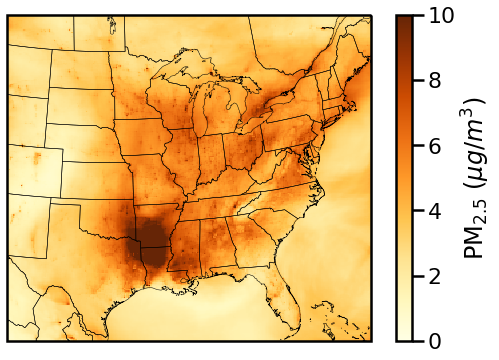

In [13]:
# Plot PM2.5 for the 12km domain
plots.conc_map(pm25_mean_12, cmap=cm.get_cmap('YlOrBr'), figsize=(9,6), ax=None, cartopy_crs=ccrs_12, proj_bounds=proj_bounds_12, 
    vmin=0, vmax=10, cbar_args={"cbar_ticks": [0, 2, 4, 6, 8, 10], "cbar_label": 'PM$_{2.5}$ ($\mu g/m^{3}$)'}, 
    savefig=False, figpath='../cmaqpy/data/plots/pm25_12km.png')


/home/jas983/anaconda3/envs/oshwind/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


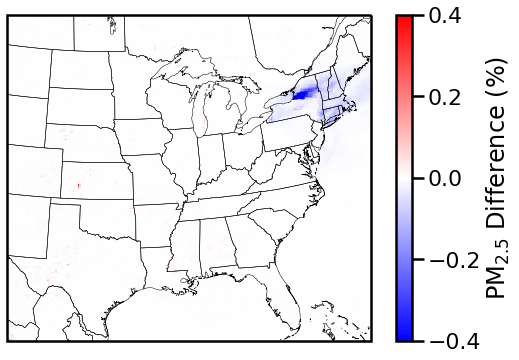

In [31]:
# Plot PM2.5 Difference for the 12km domain
plots.conc_map(pm25_mean_pct_diff_12, cmap=cm.get_cmap('bwr'), figsize=(9,6), ax=None, cartopy_crs=ccrs_12, proj_bounds=proj_bounds_12, 
    vmin=-0.4, vmax=0.4, 
    cbar_args={
        # "cbar_ticks": [-0.2, -0.1, 0, 0.1, 0.2], 
        "cbar_label": 'PM$_{2.5}$ Difference (%)',
        }, 
    savefig=True, figpath='../cmaqpy/data/plots/pm25_diff_12km.png')

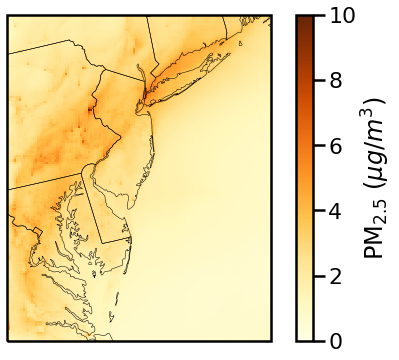

In [19]:
# Plot PM2.5 for the 4km domain
plots.conc_map(pm25_mean_4, cmap=cm.get_cmap('YlOrBr'), figsize=(9,6), ax=None, cartopy_crs=ccrs_4, proj_bounds=proj_bounds_4, 
    vmin=0, vmax=10, cbar_args={"cbar_ticks": [0, 2, 4, 6, 8, 10], "cbar_label": 'PM$_{2.5}$ ($\mu g/m^{3}$)'}, 
    savefig=False, figpath='../cmaqpy/data/plots/pm25_4km.png')

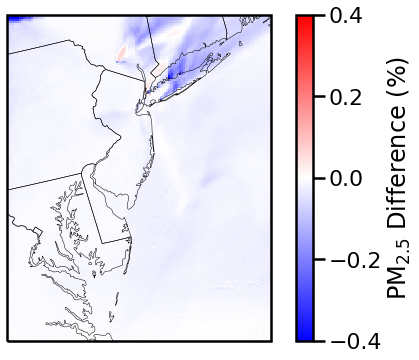

In [32]:
# Plot PM2.5 Difference for the 12km domain
plots.conc_map(pm25_mean_pct_diff_4, cmap=cm.get_cmap('bwr'), figsize=(9,6), ax=None, cartopy_crs=ccrs_4, proj_bounds=proj_bounds_4, 
    vmin=-0.4, vmax=0.4, 
    cbar_args={
        # "cbar_ticks": [-0.01, -0.005, 0, 0.005, 0.01], 
        "cbar_label": 'PM$_{2.5}$ Difference (%)'
        }, 
    savefig=True, figpath='../cmaqpy/data/plots/pm25_diff_4km.png')

/home/jas983/anaconda3/envs/oshwind/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


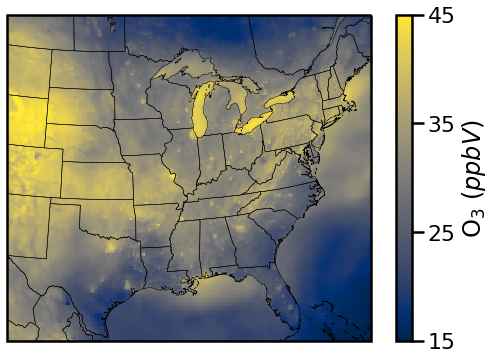

In [24]:
# Plot O3 for the 12km domain
plots.conc_map(o3_mean_12, cmap=cm.get_cmap('cividis'), figsize=(9,6), ax=None, cartopy_crs=ccrs_12, proj_bounds=proj_bounds_12, 
    vmin=15, vmax=45, cbar_args={"cbar_ticks": [15, 25, 35, 45], "cbar_label": 'O$_{3}$ ($ppbV$)'}, 
    savefig=False, figpath='../cmaqpy/data/plots/o3_12km.png')

/home/jas983/anaconda3/envs/oshwind/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


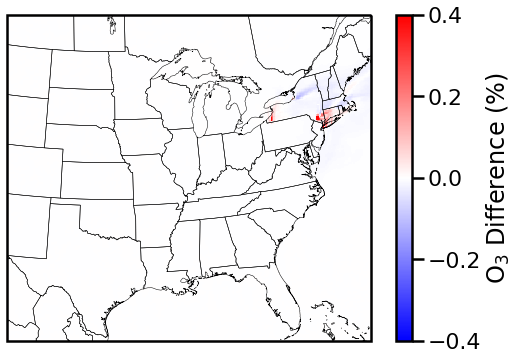

In [37]:
# Plot O3 diff for the 12km domain
plots.conc_map(o3_mean_pct_diff_12, cmap=cm.get_cmap('bwr'), figsize=(9,6), ax=None, cartopy_crs=ccrs_12, proj_bounds=proj_bounds_12, 
    vmin=-0.4, vmax=0.4, 
    cbar_args={
        # "cbar_ticks": [-0.2, -0.1, 0, 0.1, 0.2], 
        "cbar_label": 'O$_{3}$ Difference (%)'
        }, 
    savefig=True, figpath='../cmaqpy/data/plots/o3_diff_12km.png')

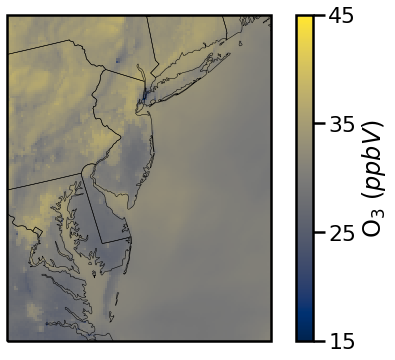

In [32]:
# Plot O3 for the 12km domain
plots.conc_map(o3_mean_4, cmap=cm.get_cmap('cividis'), figsize=(9,6), ax=None, cartopy_crs=ccrs_4, proj_bounds=proj_bounds_4, 
    vmin=15, vmax=45, cbar_args={"cbar_ticks": [15, 25, 35, 45], "cbar_label": 'O$_{3}$ ($ppbV$)'}, 
    savefig=True, figpath='../cmaqpy/data/plots/o3_4km.png')

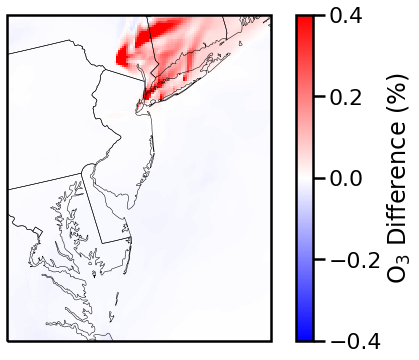

In [36]:
# Plot O3 diff for the 4km domain
plots.conc_map(o3_mean_pct_diff_4, cmap=cm.get_cmap('bwr'), figsize=(9,6), ax=None, cartopy_crs=ccrs_4, proj_bounds=proj_bounds_4, 
    vmin=-0.4, vmax=0.4, 
    cbar_args={
        # "cbar_ticks": [-0.2, -0.1, 0, 0.1, 0.2], 
        "cbar_label": 'O$_{3}$ Difference (%)'
        }, 
    savefig=True, figpath='../cmaqpy/data/plots/o3_diff_4km.png')